In [1]:
import pandas as pd
import numpy as np
#import math
#from random import choices
#import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap
#import statistics

In [2]:
import devanalyst.simulation.statics as S_
import devanalyst.simulation.GenerateTimecards as timecard
from devanalyst.simulation.GenerateTimecards import WorkAssignments
from devanalyst.simulation.simulationModels import BalancedAllocationModel, GreedyAllocationModel, ModelsConfig, \
Distribution, DefaultCostModel

importing Jupyter notebook from c:\alex\code\labs\devanalyst\devanalyst\simulation\statics.ipynb
importing Jupyter notebook from c:\alex\code\labs\devanalyst\devanalyst\simulation\GenerateTimecards.ipynb
importing Jupyter notebook from c:\alex\code\labs\devanalyst\devanalyst\simulation\simulationModels.ipynb


In [3]:
import devanalyst.simulation.tests.test_utils as tu_

importing Jupyter notebook from c:\alex\code\labs\devanalyst\devanalyst\simulation\tests\test_utils.ipynb


In [4]:
import devanalyst.simulation.visualizations.simm_visuals as simm_visuals
import devanalyst.simulation.visualizations.timecard_visuals as tc_visuals

importing Jupyter notebook from c:\alex\code\labs\devanalyst\devanalyst\simulation\visualizations\simm_visuals.ipynb
importing Jupyter notebook from c:\alex\code\labs\devanalyst\devanalyst\simulation\visualizations\timecard_visuals.ipynb


<h1>Pilots</h1>

<h2>Bug inflow prototypes</h2>

In [5]:
def genReleaseCycleSheets(modelsConfig):
    RELEASE_DURATION = 60
    SPRINT_DURATION = 10
    
    tu_.loadTestResources()
    
    teams_df, stories_df, teamsRepo, storiesRepo, ticketsRepo = tu_.initTestData(tu_.DEV_DF, \
                                                                                           tu_.PM_DF, \
                                                                                           RELEASE_DURATION, \
                                                                                           SPRINT_DURATION, \
                                                                                          modelsConfig)
    
    NUMBER_OF_SPRINTS = 25

    entries_df, releaseLog = timecard.runReleaseCycle(teamsRepo, ticketsRepo, storiesRepo, datetime(2018, 1, 15), \
                                                   SPRINT_DURATION, NUMBER_OF_SPRINTS, modelsConfig)    
    
    return entries_df, releaseLog, teamsRepo, storiesRepo

In [6]:
SPRINT_DURATION = 10
modelsConfig = ModelsConfig([DefaultCostModel(0.25)], [], GreedyAllocationModel(SPRINT_DURATION)) 
modelsConfig.random.reset(271)
entries_df, releaseLog, TEAMS_REPO, STORIES_REPO = genReleaseCycleSheets(modelsConfig)

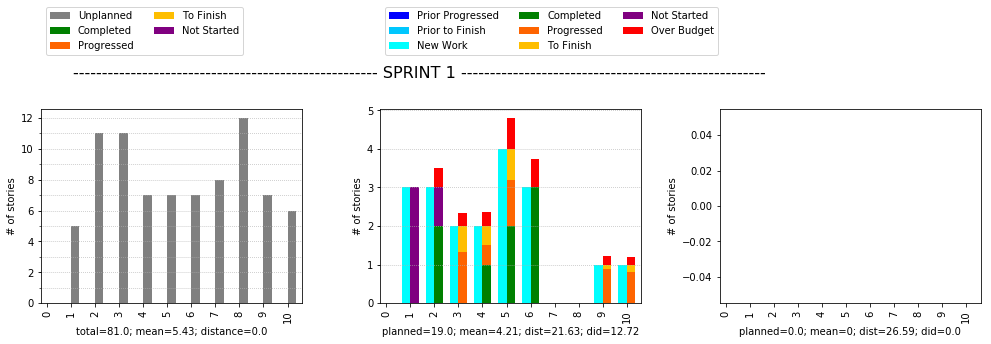

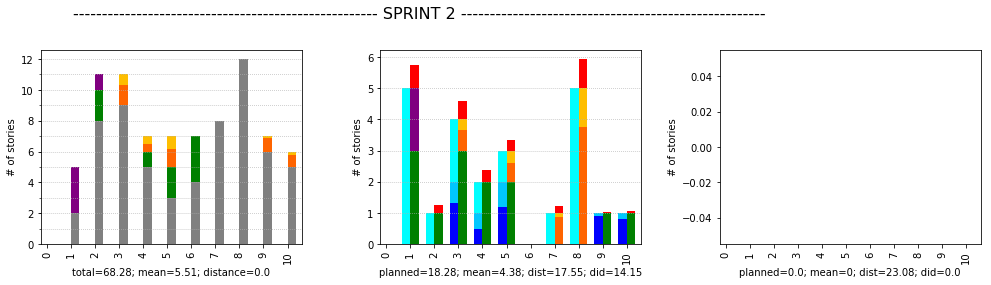

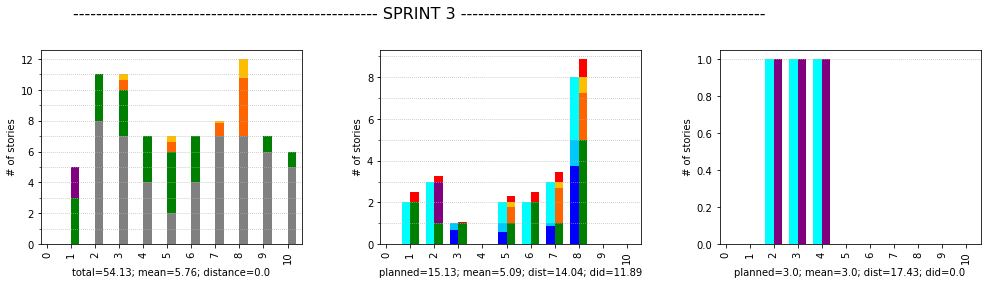

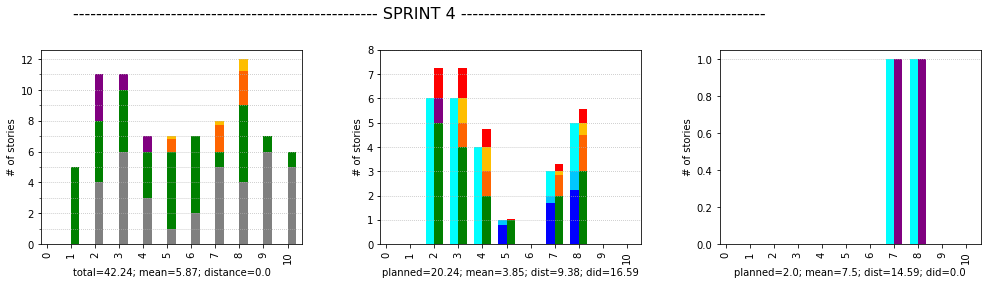

In [7]:
tc_visuals.renderReleaseCycleLog('Team A', releaseLog, 1, 4)

In [ ]:
end_df = releaseLog.log['Team A'][1]['planned_End_CURRENT_SPRINT']
end_df

<h2>Burnout in release cycle - Pilot</h2>

In [ ]:
# 
def genReleaseCycle(modelsConfig):
    RELEASE_DURATION = 60
    SPRINT_DURATION = 10
    
    tu_.loadTestResources()
    
    teams_df, stories_df, teamsRepo, storiesRepo, ticketsRepo = tu_.initTestData(tu_.DEV_DF, \
                                                                                           tu_.PM_DF, \
                                                                                           RELEASE_DURATION, \
                                                                                           SPRINT_DURATION, \
                                                                                          modelsConfig)
    
    NUMBER_OF_SPRINTS = 25

    entries_df, worksheets = timecard.runReleaseCycle(teamsRepo, ticketsRepo, storiesRepo, datetime(2018, 1, 15), \
                                                   SPRINT_DURATION, NUMBER_OF_SPRINTS, modelsConfig)    
    
    return entries_df, worksheets, storiesRepo

In [ ]:
def genBurnout(entries_df, storiesRepo):
    bystory = entries_df.groupby('User Story')
    u = bystory.apply(storyInfo, storiesRepo)
    
    
    u = u.reset_index()
    u.drop(['level_1'], axis='columns', inplace=True)
    s = u.groupby('Final Sprint')
    burnout = s.apply(sprintInfo)
    burnout = burnout.reset_index()
    burnout.drop(['level_1'], axis='columns', inplace=True)
    

    return burnout, u

In [ ]:
def storyInfo(group_df, storiesRepo):
    info = {}
    
    #Go back, as min['Date'] is end of first sprint
    info['Start'] = [timecard.subtractBusinessDays(group_df['Date'].min(), SPRINT_DURATION)] 
    info['End'] = [group_df['Date'].max()]
    info['Elapsed Time'] = (info['End'][0] - info['Start'][0]).days
    info['Effort'] = group_df['Time Spent'].sum()
    info['Initial Sprint'] = [group_df['Sprint'].min()]
    info['Final Sprint'] = [group_df['Sprint'].max()]  
    '''
    userStoryId = group_df['User Story']
    userStory = storiesRepo.findStory(userStoryId)
    info['Original estimate'] = userStory.originalEstimate    
    '''
    
    return pd.DataFrame(info)

In [ ]:
def sprintInfo(group_df):
    info = {}
    
    info['Effort'] = group_df['Effort'].sum()
    info['Avg Effort'] = group_df['Effort'].mean()
    info['Stories Completed'] = [group_df['User Story'].count()]
    info['Over 1 sprint'] = [group_df[group_df['Elapsed Time']==14]['User Story'].count()]
    info['Over 2 sprint'] = [group_df[group_df['Elapsed Time']==28]['User Story'].count()]
    info['Over 3 sprint'] = [group_df[group_df['Elapsed Time']==42]['User Story'].count()]
    info['Over 4 sprint'] = [group_df[group_df['Elapsed Time']==56]['User Story'].count()]
 
    
    return pd.DataFrame(info)

In [ ]:
SPRINT_DURATION = 10
modelsConfig1 = ModelsConfig([DefaultCostModel(0.0)], [], BalancedAllocationModel(SPRINT_DURATION)) 
modelsConfig1.random.reset(271)
entries_df1, worksheets1, storiesRepo = genReleaseCycle(modelsConfig1)

In [ ]:
burn1, u1 = genBurnout(entries_df1, storiesRepo)
burn1

In [ ]:
u1

In [ ]:
SPRINT_DURATION = 10
modelsConfig2 = ModelsConfig([DefaultCostModel(0.0)], [], GreedyAllocationModel(SPRINT_DURATION)) 
modelsConfig2.random.reset(271)
entries_df2, worksheets2, storiesRepo = genReleaseCycle(modelsConfig2)

In [ ]:
burn2, u2 = genBurnout(entries_df2, storiesRepo)
burn2

In [ ]:
burn1['Effort'].plot(label = 'Balanced'), burn2['Effort'].plot(label = 'Greedy'), plt.legend()

In [ ]:
burn1['Avg Effort'].plot(label = 'Balanced'), burn2['Avg Effort'].plot(label = 'Greedy'), plt.legend()

In [ ]:
u1_10 = u1[u1['Final Sprint'] == 10]
u1_10.shape

In [ ]:
u1_10[u1_10['Initial Sprint'] == 10]['Effort'].mean()

In [ ]:
u1_10['Effort'].mean()

In [ ]:
u1_10[u1_10['Initial Sprint'] == 10].shape

In [ ]:
u1_10[u1_10['Initial Sprint'] == 9]['Effort'].mean()

In [ ]:
u1_10[u1_10['Initial Sprint'] == 9].shape